In [43]:
run all_utils.ipynb

In [44]:
## test on root -> 2 citations - > 4 citations (7 papers)
## this will be a dummy code 
## code block needed 

import networkx as nx
from matplotlib import pylab as pl
from itertools import combinations 
def get_data(paper_where):
        
    base_url = 'https://www.semanticscholar.org'
    filter_ = '?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations'
    print(base_url+paper_where+filter_)
    soup = get_shemantic_paper_html(paper_where)
    data = extract_data(soup)
    #print(data)
    corpus_id = ''.join(data['corpus_id'].split(' '))
    data_api = get_semantic_scholar_paper_by_api(corpus_id)
    
    abstract = data_api['abstract']
    topics = data['topics']
    citations =  [cit['link'] for cit in data['citations'][:2]] ## get 2 citation per paper
    #print(topics)
    return topics , abstract ,citations
    
    ## get data 
    
    #return  topics
def make_graph_from_abstarct(abstract):
    '''
    generate graph with weights and betweenss from abstarct text 
    args : abstract string 
    return : nx graph 
    '''
    text_network = create_graph(abstract)
    text_network = calculate_central_nodes(text_network,max_nodes = -1)
    return text_network

def procees_topics(topics_raw):
    '''
    procees topics stings to have same format as full graph nodes
    
    args : raw  topic list from api 
    return : cleaned list of topics 
    '''
    topics_words = ((' '.join(topics_raw)).translate(str.maketrans('', '', string.punctuation))).split(' ')
    top = preprocess(topics_words)
    return top
    
def filter_graph(full_graph,topics):
    '''
    process topics list then filter full graph giben topics nodes and merging edges 
    '''
    graph = nx.Graph()
    return filtred_graph




def get_topic_nodes_in_full_g(topics,graph):
    topics_f = procees_topics(topics)
    return list(set(topics_f).intersection(set(list(graph.nodes))))


def all_pairs_From(list_):
    return list(combinations(list_ , 2)) 
def get_Sp(pair,graph ,topics_f):
    is_edgeable = False
    ## get s path
    path = nx.shortest_path(graph,source=pair[0],target=pair[1], weight='distance')
    ## check if path nodes in topics_list
    non_terminal_nodes = path[1:-1]
    is_edgeable = (list(set(non_terminal_nodes).intersection(set(list(topics_f)))) == []) | (non_terminal_nodes==[])
    return path , is_edgeable
def compute_edge_from_path(path,graph):
    #print(path)
    pairs_ = list(zip(path, path[1:] + path[:1]))[:-1] ## delete last couple that link terminal nodes
    #print(pairs_)
    weights = [graph[pair_[0]][pair_[1]]['weight'] for pair_ in pairs_]
    #print(weights)
    edge_weight=0
    for w in weights : 
        edge_weight+=1/w
 
    return 1/edge_weight , (path[0],path[-1])
    

def topic_graph(abstract,topics):
    ## main 
    edge_list = []
    text_network = create_graph(abstract)
    
    ## only on topic words that are in abtract (maybe we can have null edge nodes in future ...)
    topics_f = get_topic_nodes_in_full_g(topics,text_network)
    
    pairs = all_pairs_From(topics_f)
    
    for pair in pairs : 
        path , is_edgeable = get_Sp(pair,text_network,topics_f)
    
        if is_edgeable : 
    
            w,nodes = compute_edge_from_path(path,text_network)
            edge_list.append((nodes[0], nodes[1], {"weight": w}))
    
    G = nx.Graph(edge_list) 
    return G
        
def plot_graph(graph):
    pl.figure()
    nx.draw_networkx(graph)
    pl.show()

depth =  0
https://www.semanticscholar.org/paper/XGBoost%3A-A-Scalable-Tree-Boosting-System-Chen-Guestrin/26bc9195c6343e4d7f434dd65b4ad67efe2be27a?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:4650265
topics :  ['XGBoost', 'Scalability', 'Machine learning', 'Data compression', 'Sparse matrix', 'Shard (database architecture)', 'Data science', 'End-to-end principle', 'Approximation algorithm', 'CPU cache', 'End system']
citations :  ['/paper/LightGBM%3A-A-Highly-Efficient-Gradient-Boosting-Tree-Ke-Meng/497e4b08279d69513e4d2313a7fd9a55dfb73273', '/paper/SoilGrids250m%3A-Global-gridded-soil-information-on-Hengl-Jesus/9e27190f2d9b2167d4a66b88696def4585072fd5']


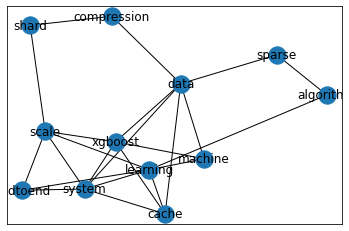

---------------------------------------
depth =  1
https://www.semanticscholar.org/paper/LightGBM%3A-A-Highly-Efficient-Gradient-Boosting-Tree-Ke-Meng/497e4b08279d69513e4d2313a7fd9a55dfb73273?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:3815895
topics :  ['Gradient boosting', 'Decision tree', 'XGBoost', 'Information gain in decision trees', 'Electronic flight bag', 'Machine learning', 'Scalability', 'Greedy algorithm', 'Kullback–Leibler divergence', 'Approximation algorithm', 'Exclusive or', 'Computation', 'Experiment', 'Sparse matrix', 'NP-hardness', 'Super Game Boy', 'Gibbs sampling']


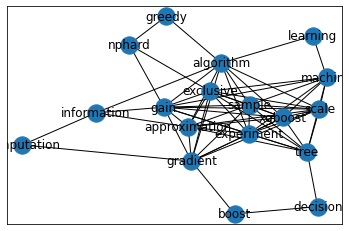

https://www.semanticscholar.org/paper/SoilGrids250m%3A-Global-gridded-soil-information-on-Hengl-Jesus/9e27190f2d9b2167d4a66b88696def4585072fd5?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:14728657
topics :  ['anatomical layer', 'Estimated', 'Classification', 'Cross Reactions', 'Satellite Imagery', 'Numbers', 'FRONTOTEMPORAL DEMENTIA, CHROMOSOME 3-LINKED', 'Class', 'Preparation', 'File Transfer Protocol']


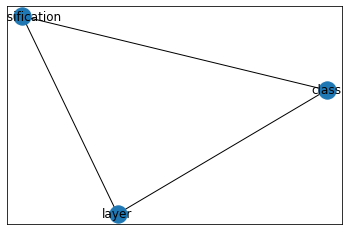

---------------------------------------
depth =  2
https://www.semanticscholar.org/paper/CatBoost%3A-unbiased-boosting-with-categorical-Ostroumova-Gusev/ee0a0f04d45f86bf50b24d7258e884725fcaa621?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:5044218
topics :  ['Gradient boosting', 'Algorithm', 'Spectral leakage']


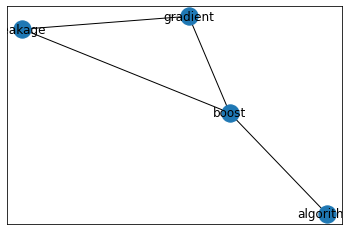

https://www.semanticscholar.org/paper/Deep-Convolutional-Neural-Networks-for-Breast-Image-Rakhlin-Shvets/198d308169e7b95aced6e6b65918a548be20235d?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:3656877
topics :  ['Gradient boosting', 'Artificial neural network', 'Convolutional neural network', 'Convolution', 'Overfitting', 'Image analysis', 'ImageNet', 'Computer vision', 'Deep learning', 'Algorithm', 'Effective method', 'Operating point', 'Sensitivity and specificity']


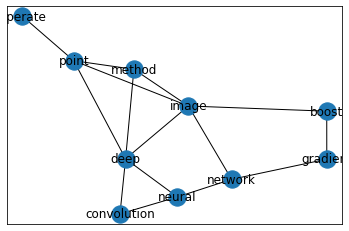

https://www.semanticscholar.org/paper/A-global-atlas-of-the-dominant-bacteria-found-in-Delgado-Baquerizo-Oliverio/14982c49b65e76b30c57259b43c0efa8eb3f6f2c?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:206664669
topics :  ['Community', 'Cervical Atlas']


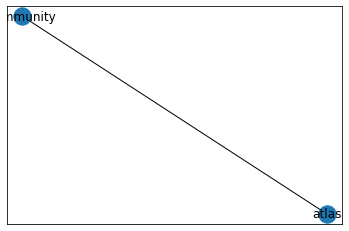

https://www.semanticscholar.org/paper/Deep-learning-and-process-understanding-for-Earth-Reichstein-Camps-Valls/b2114228411d367cfa6ca091008291f250a2c490?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:61156451
topics :  ['Deep learning', 'Earth system science', 'Machine learning', 'Systems science', 'Physical Phenomenon or Property', 'Projections and Predictions']


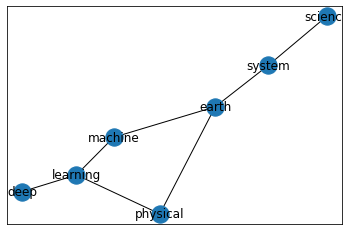

---------------------------------------
depth =  3
https://www.semanticscholar.org/paper/CatBoost%3A-gradient-boosting-with-categorical-Dorogush-Ershov/f5fbcd9ff72c5820a21b9d6871d2a3d475c9bb7f?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:26037613
topics :  ['Gradient boosting', 'Algorithm', 'Library (computing)', 'Central processing unit']


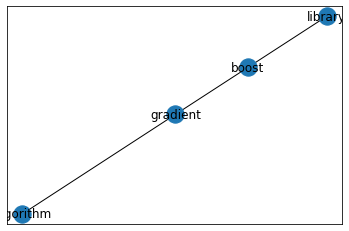

https://www.semanticscholar.org/paper/Explainable-AI-for-Trees%3A-From-Local-Explanations-Lundberg-Erion/328899dd523c907f502d2eee97c568db2883e5c8?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:152282481
topics :  ['Machine learning', 'explanation', 'Trees (plant)', 'Gradient boosting', 'Game theory', 'Nonlinear system', 'Random forest', 'Decision tree', 'Feature interaction problem', 'Chronic Kidney Insufficiency', 'P (complexity)', 'Predictive modelling', 'Kidney Diseases', 'Algorithm', 'New type']


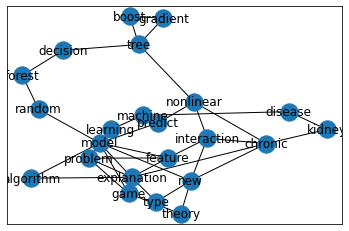

https://www.semanticscholar.org/paper/Opportunities-and-obstacles-for-deep-learning-in-Ching-Himmelstein/dc0c84b7c5e6521216da789f8171544709120cf0?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:4641273
topics :  ['health records', 'Biomedicine', 'anatomical layer', 'algorithm']


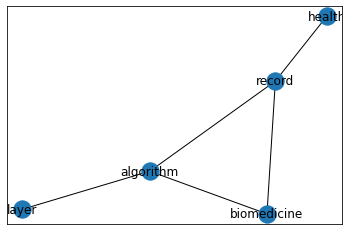

https://www.semanticscholar.org/paper/Albumentations%3A-fast-and-flexible-image-Buslaev-Parinov/17555c227941654bc19d613742e2508f209c6d86?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:52298265
topics :  ['Computer vision', 'Overfitting', 'Image processing', 'Deep learning', 'Convolutional neural network', 'Library (computing)', 'Artificial neural network', 'Image scaling']


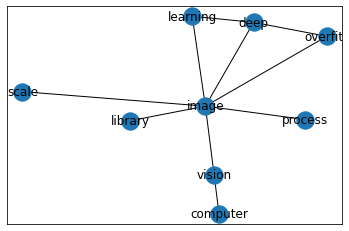

https://www.semanticscholar.org/paper/Guidelines-for-the-use-of-flow-cytometry-and-cell-Cossarizza-Chang/43845cf0b02e52bbe57ad7876c029e5165fee26a?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:204813134
topics :  ['Flow Cytometry']


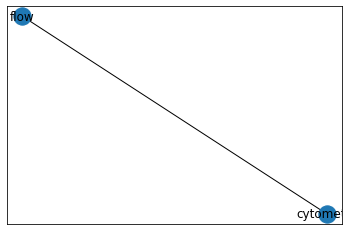

https://www.semanticscholar.org/paper/Core-microbiomes-for-sustainable-agroecosystems-Toju-Peay/28689043f11f4d982c4b4f1cfd5a2ff1487ba3f8?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:19234763
topics :  ['Microbiome', 'Ecosystem', 'Informatics (discipline)', 'Community', 'Scientific Publication', 'Plant Development', 'Pathogenic organism', 'interest', 'Embryophyta', 'Microorganism']


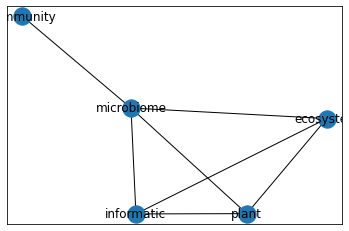

https://www.semanticscholar.org/paper/Tackling-Climate-Change-with-Machine-Learning-Rolnick-Donti/998039a4876edc440e0cabb0bc42239b0eb29644?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:189762063
topics :  ['Machine learning', 'Fill']


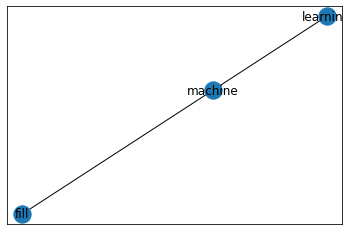

https://www.semanticscholar.org/paper/Taking-climate-model-evaluation-to-the-next-level-Eyring-Cox/1f6a501d0d7104541d52d802a23f4201b28db6fc?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations


AttributeError: 'NoneType' object has no attribute 'find_all'

In [46]:
## test __main__
## root paper 


n_iter = 5 
print('depth = ' , 0 )
## root paper 
root_url = '/paper/XGBoost%3A-A-Scalable-Tree-Boosting-System-Chen-Guestrin/26bc9195c6343e4d7f434dd65b4ad67efe2be27a'
topics , abstract,citations= get_data(root_url)
print('topics : ',topics)
print('citations : ', citations)
graph = topic_graph(abstract,topics)
plot_graph(graph)
print('---------------------------------------')
for i in range(n_iter):
    print('depth = ' , i+1 )
    cit_all = [] 
    for cit_link in citations : 
        topics_ , abstract_,citations_= get_data(cit_link)
        print('topics : ',topics_)
        #print('citations : ', citations_)
        graph = topic_graph(abstract_,topics_)
        plot_graph(graph)
        cit_all = cit_all +citations_ 
    citations = cit_all 
        
    print('---------------------------------------')
           
   


In [47]:
## to do 
# debug paper /paper/Taking-climate-model-evaluation-to-the-next-level-Eyring-Cox/1f6a501d0d7104541d52d802a23f4201b28db6fc
## add title to topic list (catboost example)
## do section 2 : merge graphs 


[1, 2]

In [25]:
topics_f = procees_topics(topics)
text_network = create_graph(abstract)


In [26]:
text_network.nodes

NodeView(('propose', 'new', 'framework', 'estimate', 'generative', 'model', 'via', 'adversarial', 'process', 'simultaneous', 'train', 'two', 'g', 'capture', 'data', 'distribution', 'discriminate', 'probability', 'sample', 'came', 'training', 'rather', 'procedure', 'maximize', 'making', 'mistake', 'correspond', 'minimax', 'twoplayer', 'game', 'space', 'arbitrary', 'function', 'unique', 'solution', 'exist', 'recover', 'equal', '½', 'everywhere', 'case', 'define', 'multilayer', 'perceptron', 'entire', 'system', 'backpropagation', 'need', 'markov', 'chain', 'unroll', 'approximate', 'inference', 'network', 'either', 'generation', 'experiment', 'demonstrate', 'potential', 'qualitative', 'quantitative', 'evaluate', 'generate'))

In [27]:
abstract

'We propose a new framework for estimating generative models via an adversarial process, in which we simultaneously train two models: a generative model G that captures the data distribution, and a discriminative model D that estimates the probability that a sample came from the training data rather than G. The training procedure for G is to maximize the probability of D making a mistake. This framework corresponds to a minimax two-player game. In the space of arbitrary functions G and D, a unique solution exists, with G recovering the training data distribution and D equal to ½ everywhere. In the case where G and D are defined by multilayer perceptrons, the entire system can be trained with backpropagation. There is no need for any Markov chains or unrolled approximate inference networks during either training or generation of samples. Experiments demonstrate the potential of the framework through qualitative and quantitative evaluation of the generated samples.'

In [235]:
## get shortest path 
print(nx.shortest_path(text_network,source='model',target='g', weight='distance'))

['model', 'g']


In [231]:
## get weights
text_network['model']['generative']

{'weight': 3, 'distance': 0.3333333333333333}

In [124]:
from itertools import combinations 


def get_topic_nodes_in_full_g(topics,graph):
    topics_f = procees_topics(topics)
    return list(set(topics_f).intersection(set(list(graph.nodes))))


def all_pairs_From(list_):
    return list(combinations(list_ , 2)) 
def get_Sp(pair,graph ,topics_f):
    is_edgeable = False
    ## get s path
    path = nx.shortest_path(graph,source=pair[0],target=pair[1], weight='distance')
    ## check if path nodes in topics_list
    non_terminal_nodes = path[1:-1]
    is_edgeable = (list(set(non_terminal_nodes).intersection(set(list(topics_f)))) == []) | (non_terminal_nodes==[])
    return path , is_edgeable
def compute_edge_from_path(path,graph):
    #print(path)
    pairs_ = list(zip(path, path[1:] + path[:1]))[:-1] ## delete last couple that link terminal nodes
    #print(pairs_)
    weights = [graph[pair_[0]][pair_[1]]['weight'] for pair_ in pairs_]
    #print(weights)
    edge_weight=0
    for w in weights : 
        edge_weight+=1/w
 
    return 1/edge_weight , (path[0],path[-1])
    




In [130]:
## main 
edge_list = []
topics_f = get_topic_nodes_in_full_g(topics,text_network)

pairs = all_pairs_From(topics_f)

for pair in pairs : 
    path , is_edgeable = get_Sp(pair,text_network,topics_f)

    if is_edgeable : 

        w,nodes = compute_edge_from_path(path,text_network)
        edge_list.append((nodes[0], nodes[1], {"weight": w}))

G = nx.Graph(edge_list)   

10

In [129]:
G[1][2]

{'color': 'yellow'}

In [32]:
get_topic_nodes_in_full_g(topics,text_network)

['minimax',
 'generative',
 'perceptron',
 'model',
 'multilayer',
 'markov',
 'backpropagation',
 'experiment',
 'chain',
 'discriminate']

In [183]:
text_network.nodes

NodeView(('new', 'framework', 'estimate', 'model', 'via', 'adversarial', 'process', 'simultaneous', 'train', 'two', 'g', 'capture', 'data', 'distribution', 'discriminate', 'probability', 'sample', 'came', 'training', 'rather', 'maximize', 'making', 'mistake', 'correspond', 'minimax', 'twoplayer', 'game', 'space', 'arbitrary', 'function', 'unique', 'solution', 'exist', 'equal', '½', 'everywhere', 'case', 'define', 'multilayer', 'perceptron', 'entire', 'system', 'backpropagation', 'need', 'markov', 'chain', 'unroll', 'approximate', 'inference', 'network', 'either', 'generation', 'experiment', 'demonstrate', 'potential', 'qualitative', 'quantitative', 'evaluate', 'generate'))

In [236]:
set(topics_f).intersection(set(list(text_network.nodes)))

{'backpropagation',
 'chain',
 'discriminate',
 'experiment',
 'generative',
 'markov',
 'minimax',
 'model',
 'multilayer',
 'perceptron'}

In [219]:
len(set(topics_f).intersection(set(list(text_network.nodes))))

10

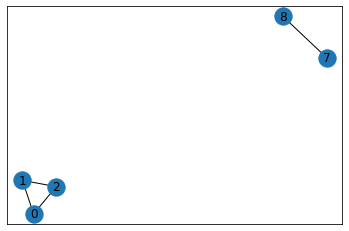

In [151]:
import networkx as nx
from matplotlib import pylab as pl


res = [0,1,2,7,8, 'parrot'] #I've added 'parrot', a node that's not in G
                              #just to demonstrate that G.subgraph is okay
                              #with nodes not in G.    
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res)  

pl.figure()
nx.draw_networkx(k, pos=pos)


#nx.draw_networkx(othersubgraph, pos=pos, node_color = 'g')
pl.show()